In [1]:
import pandas as pd
credit = pd.read_csv('../data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [2]:
X = credit.drop('credit.rating', axis =1)
y = credit['credit.rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
preds = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.71


In [6]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.52      0.37      0.43        60
           1       0.76      0.86      0.81       140

    accuracy                           0.71       200
   macro avg       0.64      0.61      0.62       200
weighted avg       0.69      0.71      0.69       200



In [7]:
confusion_matrix(y_test,preds)

array([[ 22,  38],
       [ 20, 120]], dtype=int64)

c:\Dev\Miniconda\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


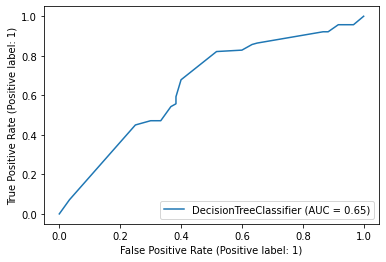

In [9]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
plot_roc_curve(clf, X_test, y_test);

In [10]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.6523809523809524

In [20]:
importance = pd.Series(clf.feature_importances_)
column_nm = pd.DataFrame(X.columns)
feature_importance = pd.concat([column_nm, importance ],
axis = 1)
feature_importance.columns =  ['column_nm','importance']
feature_importance

,column_nm,importance
0,account.balance,0.309208
1,credit.duration.months,0.117696
2,previous.credit.payment.status,0.079508
3,credit.purpose,0.067358
4,credit.amount,0.123953
5,savings,0.083084
6,employment.duration,0.000000
7,installment.rate,0.000000
8,marital.status,0.015800
9,guarantor,0.000000


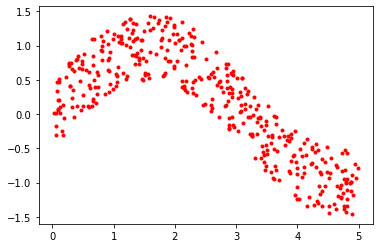

In [58]:
import matplotlib.pyplot as plt
np.random.seed(0)
X = np.sort(5* np.random.rand(400,1),axis=1)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(X).ravel()

y[::1] += 1*(0.5 - np.random.rand(400))
plt.plot(X,y, 'r.');

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [61]:
from sklearn.tree import DecisionTreeRegressor
reg_1 =DecisionTreeRegressor(max_depth=2)
reg_2 =DecisionTreeRegressor(max_depth=5)
